In [9]:
"""import open3d as o3d
import meshplot as mp
import numpy as np

def double_plot(myMesh1,myMesh2,cmap1=None,cmap2=None):
    d = mp.subplot(np.asarray(myMesh1.vertices), np.asarray(myMesh1.triangles), c=cmap1, s=[2, 2, 0])
    mp.subplot(np.asarray(myMesh2.vertices), np.asarray(myMesh2.triangles), c=cmap2, s=[2, 2, 1], data=d)

mesh1 = o3d.io.read_triangle_mesh("/Users/gozdeunver/Downloads/SphereDataset/NoCollider/Force_normal/5.obj")
mesh2 = o3d.io.read_triangle_mesh("/Users/gozdeunver/Downloads/SphereDataset/NoCollider/Force_20_offcenter/5.obj")
print(f'Mesh 1 : {len(np.asarray(mesh1.vertices))} vertices, {len(np.asarray(mesh1.triangles))} faces\n'
      )

double_plot(mesh1,mesh2)"""

### Rotate mesh

In [3]:
import pyvista as pv
import open3d as o3d
import numpy as np
import os
import pandas as pd

In [112]:
mesh_def = pv.read("../cube (386 verts)/20/50.stl").triangulate()
mesh_org = pv.read("../cube (386 verts)/20/0.stl").triangulate()
print(len(np.asarray(mesh_def.points)))
deformation_vectors = mesh_org.points-mesh_def.points
distances_ = np.linalg.norm(deformation_vectors, axis=1)
contact_point=np.argmax(distances_)
print(contact_point)

386
28


/Users/gozdeunver/opt/anaconda3/envs/.at3dcv-point-correspondence/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


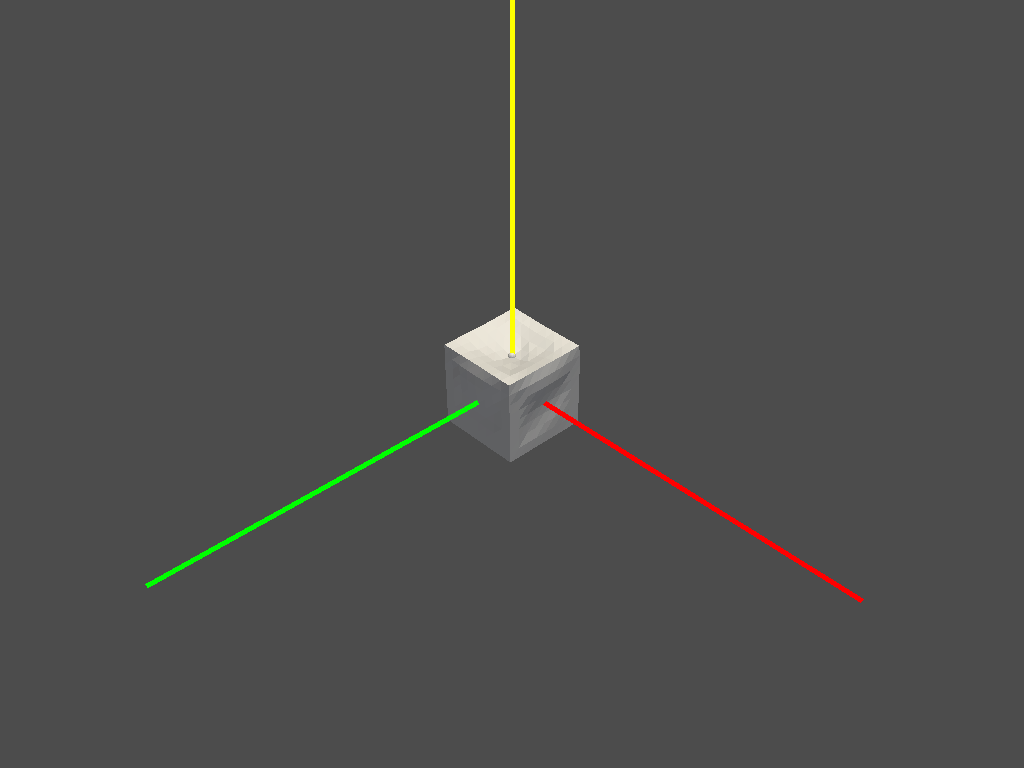

In [114]:
p = pv.Plotter()
camera = pv.Camera()
camera.position = (2, 2, 2)
camera.focal_point = mesh_def.center
p.camera = camera
p.add_mesh(mesh_def)
axes = pv.Axes(show_actor=True,line_width=5)
axes.origin = mesh_org.center
p.add_actor(axes.actor)
sphere = pv.Sphere(radius=0.01,center=mesh_def.points[28])

p.add_mesh(sphere)
p.show()

In [161]:
#nondeformed = pv.PolyData(np.asarray(nondeformed_.vertices),np.hstack(np.asarray(nondeformed_.triangles)))
#deformed=pv.PolyData(np.asarray(deformed_.vertices),np.hstack(np.asarray(deformed_.triangles)))
org_dir="359_(z_-0.01)"
outmost_path="."
nondeformed_org=pv.read(f"{outmost_path}/cube (386 verts)/{org_dir}/0.stl").triangulate()
farthest_dist=np.max(np.linalg.norm(nondeformed_org.points-nondeformed_org.center,axis=1))
nondeformed=nondeformed_org.scale([1/farthest_dist, 1/farthest_dist, 1/farthest_dist], inplace=False)

deformed_50_org=pv.read(f"{outmost_path}/cube (386 verts)/{org_dir}/50.stl").triangulate()
deformed_50=deformed_50_org.scale([1/farthest_dist, 1/farthest_dist, 1/farthest_dist], inplace=False)

deformation_vectors = nondeformed.points-deformed_50.points
distances_ = np.linalg.norm(deformation_vectors, axis=1)
contact_point=np.argmax(distances_)

axes = pv.Axes(show_actor=True,line_width=5)
axes.origin = nondeformed.center
bool_var=False
output_directory=f"./dgcnn.pytorch/data/cube/{org_dir}_Rotated"
save_dir=f"data/cube/{org_dir}_Rotated"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

if not os.path.exists("./dgcnn.pytorch/data/cube_dataset.csv"):
    f=open("./dgcnn.pytorch/data/cube_dataset.csv","w+")
    f.write("input,target,contact_vertex,train_sample\n")
else:
    f=open("./dgcnn.pytorch/data/cube_dataset.csv","a+")
    
for i in range(1,51):

    deformed_org=pv.read(f"{outmost_path}/cube (386 verts)/{org_dir}/{i}.stl").triangulate()
    deformed=deformed_org.scale([1/farthest_dist, 1/farthest_dist, 1/farthest_dist], inplace=False)

    for angle in range(0,4):
        rot = deformed.rotate_z(90 * angle, point=axes.origin, inplace=False)
        deformed_path=os.path.join(save_dir,f"{i}_z_angle{angle*90}.stl")
        rot.save(deformed_path)
        rot_non=nondeformed.rotate_z(90 * angle, point=axes.origin, inplace=False)
        non_deformed_path=os.path.join(save_dir,f"0_z_angle{angle*90}.stl")
        rot_non.save(non_deformed_path)
       
        f.write(non_deformed_path+","+deformed_path+","+str(contact_point)+","+str(bool_var)+"\n")

        rot = deformed.rotate_y(90 * angle, point=axes.origin, inplace=False)
        deformed_path=os.path.join(save_dir,f"{i}_y_angle{angle*90}.stl")
        rot.save(deformed_path)
        rot_non=nondeformed.rotate_y(90 * angle, point=axes.origin, inplace=False)
        non_deformed_path=os.path.join(save_dir,f"0_y_angle{angle*90}.stl")
        rot_non.save(non_deformed_path)
        
        f.write(non_deformed_path+","+deformed_path+","+str(contact_point)+","+str(bool_var)+"\n")

        rot = deformed.rotate_x(90 * angle, point=axes.origin, inplace=False)
        deformed_path=os.path.join(save_dir,f"{i}_x_angle{angle*90}.stl")
        rot.save(deformed_path)
        rot_non=nondeformed.rotate_x(90 * angle, point=axes.origin, inplace=False)
        non_deformed_path=os.path.join(save_dir,f"0_x_angle{angle*90}.stl")
        rot_non.save(non_deformed_path)
        
        f.write(non_deformed_path+","+deformed_path+","+str(contact_point)+","+str(bool_var)+"\n")
f.close()


In [164]:
df=pd.read_csv("./dgcnn.pytorch/data/cube_dataset.csv")
#df.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
#df.drop(["a"], axis=1, inplace=True)
#df.reset_index(drop=True,inplace=True)
df.to_csv("./dgcnn.pytorch/data/cube_dataset.csv")